## Performing K Nearest Neighbors Classification

### Loading the Datasets

In [115]:
import pandas as pd

X_original = pd.read_excel("./Datasets/Filtered_features.xlsx")
X_pca = pd.read_excel("./Datasets/PCA_features.xlsx")

Seperating Features and Target

In [116]:
y_original = X_original["Churn Value"]
y_pca = X_pca["Churn Value"]

features_original = X_original.drop(columns=["Churn Value"])
features_pca = X_pca.drop(columns=["Churn Value"])

Splitting the Data into Train and Test Split

In [117]:
from sklearn.model_selection import train_test_split

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(features_original, y_original, test_size=0.33, random_state=2)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca, y_pca, test_size=0.33, random_state=2)

## Creating and Fitting a KNN model

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn_original = KNeighborsClassifier(n_neighbors=100)
knn_original.fit(X_train_original, y_train_original)
original_predicted = knn_original.predict(X_test_original)

knn_pca = KNeighborsClassifier(n_neighbors=365)
knn_pca.fit(X_train_pca, y_train_pca)
pca_predicted = knn_pca.predict(X_test_pca)


### Scoring the model
- on the basis of Accuracy
- on the basis of Precision
- on the basis of Recall
- on the basis of F1

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# for original features
print("Accuracy Score (with original features): ")
print(accuracy_score(y_test_original, original_predicted), "\n")
print("Precision Score (with original features): ")
print(precision_score(y_test_original, original_predicted), "\n")
print("Recall Score (with original features): ")
print(recall_score(y_test_original, original_predicted), "\n")
print("F1 Score (with original features): ")
print(f1_score(y_test_original, original_predicted), "\n", "\n")

# for pca features
print("Accuracy Score (with pca features): ")
print(accuracy_score(y_test_pca, pca_predicted), "\n")
print("Precision Score (with pca features): ")
print(precision_score(y_test_pca, pca_predicted), "\n")
print("Recall Score (with pca features): ")
print(recall_score(y_test_pca, pca_predicted), "\n")
print("F1 Score (with pca features): ")
print(f1_score(y_test_pca, pca_predicted), "\n")


Accuracy Score (with original features): 
0.7970702283498492 

Precision Score (with original features): 
0.6407079646017699 

Recall Score (with original features): 
0.5746031746031746 

F1 Score (with original features): 
0.605857740585774 
 

Accuracy Score (with pca features): 
0.7862990090478242 

Precision Score (with pca features): 
0.6407563025210085 

Recall Score (with pca features): 
0.48412698412698413 

F1 Score (with pca features): 
0.5515370705244124 



### Using Wrapper Methods to optimize our model

Creating a new Model

In [120]:
new_model = KNeighborsClassifier(n_neighbors=100)
new_model.fit(X_train_original, y_train_original)
print(new_model.score(X_test_original, y_test_original))

0.7970702283498492


### Sequential Forward Floating Selection

In [121]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sffs = SFS(new_model,
           k_features = 13,
           forward=True,
           floating=True,
           scoring="accuracy",
           cv=0)

sffs.fit(X_train_original, y_train_original)

SequentialFeatureSelector(cv=0, estimator=KNeighborsClassifier(n_neighbors=100),
                          floating=True, k_features=(13, 13),
                          scoring='accuracy')

('Partner', 'Dependents', 'Tech Support', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'DSL_Service', 'month-to-month_contract', 'one-year_contract', 'two-year_contract', 'bank-transfer-auto_paymentmethod', 'credit-card-auto_paymentmethod', 'electronic-check_paymentmethod')
0.8104436425387391


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


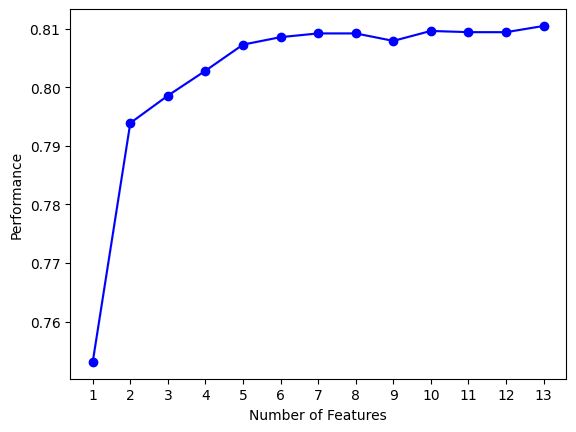

In [122]:
# print the tuple of features which were chosen
print(sffs.subsets_[13]["feature_names"])
# print the score of the model with selected features
print(sffs.subsets_[13]["avg_score"])

# plot the accuracy as a function of the number of features
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

plot_sfs(sffs.get_metric_dict())
plt.show()

### Sequential Backward Floating Selection

In [123]:
sbfs = SFS(new_model,
            k_features=8,
            forward=False,
            floating=False,
            scoring="accuracy",
            cv=0)
sbfs.fit(X_train_original, y_train_original)

SequentialFeatureSelector(cv=0, estimator=KNeighborsClassifier(n_neighbors=100),
                          forward=False, k_features=(8, 8), scoring='accuracy')

('Partner', 'Dependents', 'Multiple Lines', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'DSL_Service', 'electronic-check_paymentmethod')
0.8091700275949905


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


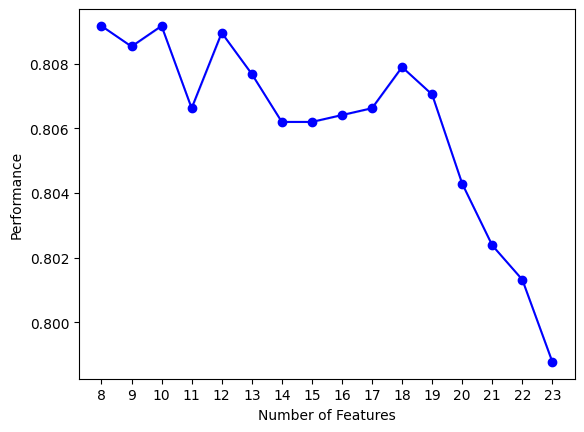

In [128]:
# print the tuple of features which were chosen
print(sbfs.subsets_[8]["feature_names"])
# print the score of the model with selected features
print(sbfs.subsets_[8]["avg_score"])
# plot the accuracy as a function of the number of features
plot_sfs(sbfs.get_metric_dict())
plt.show()

Using new features to optimize our model's performance

In [130]:
new_original_features_train = X_train_original[['Partner', 'Dependents', 'Tech Support', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'DSL_Service', 'month-to-month_contract', 'one-year_contract', 'two-year_contract', 'bank-transfer-auto_paymentmethod', 'credit-card-auto_paymentmethod', 'electronic-check_paymentmethod']]
new_original_features_test = X_test_original[['Partner', 'Dependents', 'Tech Support', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'DSL_Service', 'month-to-month_contract', 'one-year_contract', 'two-year_contract', 'bank-transfer-auto_paymentmethod', 'credit-card-auto_paymentmethod', 'electronic-check_paymentmethod']]
knn_original.fit(new_original_features_train, y_train_original)
original_predicted = knn_original.predict(new_original_features_test)
# for original features
print("Accuracy Score (with original features): ")
print(accuracy_score(y_test_original, original_predicted), "\n")
print("Precision Score (with original features): ")
print(precision_score(y_test_original, original_predicted), "\n")
print("Recall Score (with original features): ")
print(recall_score(y_test_original, original_predicted), "\n")
print("F1 Score (with original features): ")
print(f1_score(y_test_original, original_predicted), "\n", "\n")

Accuracy Score (with original features): 
0.8005170185264971 

Precision Score (with original features): 
0.6549165120593692 

Recall Score (with original features): 
0.5603174603174603 

F1 Score (with original features): 
0.6039349871685201 
 

